In [1]:
## Import Required Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from shapely.geometry import Point
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [2]:
## Common Function

## To Plot the chart between independent and Target Feature
def plotChart(dataset,CTarget_0_1,IndepFeature):
    plt.style.use('dark_background')
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    sns.distplot(df_lumpy[df_lumpy[CTarget_0_1]==0][IndepFeature],label='Not Suffered By Lumpy',hist=False,color='green')
    sns.distplot(df_lumpy[df_lumpy[CTarget_0_1]==1][IndepFeature],label="Suffered By Lumpy",hist=False,color='red')
    plt.grid(True)
    plt.legend()
    plt.show()

def plotGraph(dataset,feature):
    plt.style.use('Solarize_Light2')
    plt.figure(figsize=(15,10))
    plt.subplot(2,2,1)
    plt.title(f'{feature} Distribution Graph')
    sns.distplot(dataset[feature],color="red")

    plt.subplot(2,2,2)
    plt.title(f'{feature} Histogram Graph',color="red")
    sns.histplot(dataset[feature],color='red',kde=True,bins=10)

    plt.subplot(2,2,3)
    plt.title(f'{feature} BoxPlot')
    sns.boxplot(dataset[feature],color="red")
    plt.show()    

In [3]:
## Import Data from CSV

In [4]:
df_lumpy = pd.read_csv("Lumpy skin disease data.csv")

In [5]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [6]:
Original_data = df_lumpy.copy()

In [7]:
## Check data whether it loads or not
df_lumpy.head()

x          y region     country reportingDate   cld   dtr    frs  \
0  90.380931  22.437184   Asia  Bangladesh     10/9/2020  41.6  12.8   0.00   
1  87.854975  22.986757   Asia       India    20/12/2019  40.5  13.3   0.00   
2  85.279935  23.610181   Asia       India    20/12/2019  27.3  13.6   0.08   
3  81.564510  43.882221   Asia       China    25/10/2019  45.3  12.8  31.00   
4  81.161057  43.834976   Asia       China    25/10/2019  38.8  13.2  31.00   

   pet   pre   tmn   tmp   tmx   vap   wet  elevation  dominant_land_cover  \
0  2.3   1.7  12.7  19.1  25.5  15.7  0.00        147                    2   
1  2.4   0.0  13.2  19.8  26.5  16.3  0.00        145                    2   
2  2.3   0.6   9.4  16.2  23.0  13.0  0.98        158                    2   
3  0.4   8.8 -22.5 -16.1  -9.7   0.9  4.64        178                    2   
4  0.4  10.5 -20.4 -13.8  -7.2   1.2  1.69        185                    3   

   X5_Ct_2010_Da  X5_Bf_2010_Da  lumpy  
0   27970.983100    3691.746950      1  
1   25063.646690     671.326701      1  
2    6038.477155    1426.839831      1  
3     760.703340       0.000000      1  
4     270.367426       0.000000      1

In [8]:
df_lumpy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24803 entries, 0 to 24802
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   x                    24803 non-null  float64
 1   y                    24803 non-null  float64
 2   region               3039 non-null   object 
 3   country              3039 non-null   object 
 4   reportingDate        3039 non-null   object 
 5   cld                  24803 non-null  float64
 6   dtr                  24803 non-null  float64
 7   frs                  24803 non-null  float64
 8   pet                  24803 non-null  float64
 9   pre                  24803 non-null  float64
 10  tmn                  24803 non-null  float64
 11  tmp                  24803 non-null  float64
 12  tmx                  24803 non-null  float64
 13  vap                  24803 non-null  float64
 14  wet                  24803 non-null  float64
 15  elevation            24803 non-null 

In [9]:
### Dataset details
# 1.data loads successfully
# 2.In the dataset we have total 24803 data-points and 19 dependent features and 1 independent/Target feature. (While data pre-processing we will ignore some of the unwanted features depends on the analysis)
# 3.Here we have 3 types of data (int,float and object/categorical)
# 4. 14 features have float type , 2 features have int type and 3 are object / categorical type data.
# 5. the data acquire 3.8+ MB machine memory.
# 6.The x and y feature looks like it is Latitude and Longitude geocoded. For better understanding, let rename the columns/features x to Longitude and y to Latitude.

<h2> Check for Duplicate datapoints </h2>

In [10]:
df_lumpy.duplicated().sum()

608

In [11]:
## Here we have total 608 data points which is duplicate

In [12]:
## Let's Remove the duplicate data points
df_lumpy= df_lumpy.drop_duplicates()

In [13]:
df_lumpy.shape

(24195, 20)

In [14]:
df_lumpy.head()

x          y region     country reportingDate   cld   dtr    frs  \
0  90.380931  22.437184   Asia  Bangladesh     10/9/2020  41.6  12.8   0.00   
1  87.854975  22.986757   Asia       India    20/12/2019  40.5  13.3   0.00   
2  85.279935  23.610181   Asia       India    20/12/2019  27.3  13.6   0.08   
3  81.564510  43.882221   Asia       China    25/10/2019  45.3  12.8  31.00   
4  81.161057  43.834976   Asia       China    25/10/2019  38.8  13.2  31.00   

   pet   pre   tmn   tmp   tmx   vap   wet  elevation  dominant_land_cover  \
0  2.3   1.7  12.7  19.1  25.5  15.7  0.00        147                    2   
1  2.4   0.0  13.2  19.8  26.5  16.3  0.00        145                    2   
2  2.3   0.6   9.4  16.2  23.0  13.0  0.98        158                    2   
3  0.4   8.8 -22.5 -16.1  -9.7   0.9  4.64        178                    2   
4  0.4  10.5 -20.4 -13.8  -7.2   1.2  1.69        185                    3   

   X5_Ct_2010_Da  X5_Bf_2010_Da  lumpy  
0   27970.983100    3691.746950      1  
1   25063.646690     671.326701      1  
2    6038.477155    1426.839831      1  
3     760.703340       0.000000      1  
4     270.367426       0.000000      1

In [15]:
df_lumpy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24195 entries, 0 to 24802
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   x                    24195 non-null  float64
 1   y                    24195 non-null  float64
 2   region               2431 non-null   object 
 3   country              2431 non-null   object 
 4   reportingDate        2431 non-null   object 
 5   cld                  24195 non-null  float64
 6   dtr                  24195 non-null  float64
 7   frs                  24195 non-null  float64
 8   pet                  24195 non-null  float64
 9   pre                  24195 non-null  float64
 10  tmn                  24195 non-null  float64
 11  tmp                  24195 non-null  float64
 12  tmx                  24195 non-null  float64
 13  vap                  24195 non-null  float64
 14  wet                  24195 non-null  float64
 15  elevation            24195 non-null 

In [16]:
# Rename the features
df_lumpy.rename(columns={"x":"Longitude" , "y":"Latitude"},inplace=True,errors="raise")

In [17]:
geolocation = df_lumpy[['Latitude','Longitude','country']]
geolocation.head()

Latitude  Longitude     country
0  22.437184  90.380931  Bangladesh
1  22.986757  87.854975       India
2  23.610181  85.279935       India
3  43.882221  81.564510       China
4  43.834976  81.161057       China

In [18]:
fig = px.scatter_geo(geolocation,lat='Latitude',lon='Longitude')
fig.update_layout(title = 'Lumpy Skin Disease Area', title_x=0.5)
fig.show()

In [19]:
# 1.Above we plot the the map using Latitude and Longitude geocode. The blue area in map show that the spread Lumpy disease.
# 2.we can see that the disease are in almost all the countries.

### Exploratory Data Analysis

In [20]:
## Check the Data describtion
df_lumpy.describe()

Longitude      Latitude           cld           dtr           frs  \
count  24195.000000  24195.000000  24195.000000  24195.000000  24195.000000   
mean      80.481799     46.589472     59.208758      9.148775     24.230508   
std       43.068859     19.376367     19.502036      3.006721     11.401773   
min     -179.750000    -28.750000      0.000000      2.000000      0.000000   
25%       46.750000     35.250000     43.400000      6.800000     23.800000   
50%       81.750000     49.250000     62.100000      8.300000     31.000000   
75%      110.750000     62.250000     75.000000     11.200000     31.000000   
max      179.750000     81.750000     98.700000     20.600000     31.000000   

                pet           pre           tmn           tmp           tmx  \
count  24195.000000  24195.000000  24195.000000  24195.000000  24195.000000   
mean       0.793151     24.938859    -16.231928    -11.643703     -7.077462   
std        1.181585     32.389637     17.554205     17.983279     18.560696   
min        0.000000      0.000000    -52.100000    -48.100000    -44.200000   
25%        0.000000      5.700000    -30.600000    -26.000000    -21.200000   
50%        0.200000     14.200000    -19.800000    -14.700000    -10.300000   
75%        1.000000     31.500000     -2.700000      1.000000      4.400000   
max        7.500000    341.900000     23.900000     28.500000     36.400000   

                vap           wet     elevation  dominant_land_cover  \
count  24195.000000  24195.000000  24195.000000         24195.000000   
mean       3.644894      8.475692    164.813598             4.444844   
std        4.957740      6.245814     19.712574             2.416406   
min        0.000000      0.000000     66.000000             0.000000   
25%        0.400000      2.880000    152.000000             3.000000   
50%        1.400000      7.880000    161.000000             4.000000   
75%        4.700000     12.690000    176.000000             4.000000   
max       28.600000     30.920000    249.000000            11.000000   

       X5_Ct_2010_Da  X5_Bf_2010_Da         lumpy  
count   24195.000000   24195.000000  24195.000000  
mean      618.578457     173.978322      0.100475  
std      2302.448600    1140.246573      0.300639  
min         0.000000       0.000000      0.000000  
25%         2.390413       0.000000      0.000000  
50%        37.428863       0.000207      0.000000  
75%       340.879526       0.002167      0.000000  
max    167388.672700   56654.780150      1.000000

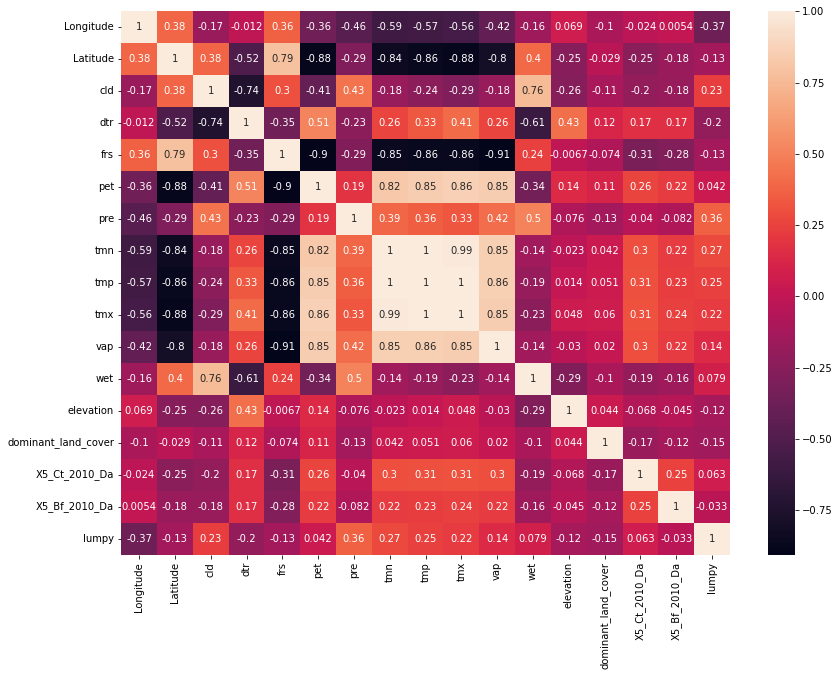

In [21]:
## Check the co-rrelation 
plt.figure(figsize=(30,10))
plt.subplot(121)
sns.heatmap(df_lumpy.corr(),annot=True)
plt.show()

## Univarient Data Analysis

In [22]:
df_lumpy.head()
#df_lumpy.style.highlight_null(null_color='red')

Longitude   Latitude region     country reportingDate   cld   dtr    frs  \
0  90.380931  22.437184   Asia  Bangladesh     10/9/2020  41.6  12.8   0.00   
1  87.854975  22.986757   Asia       India    20/12/2019  40.5  13.3   0.00   
2  85.279935  23.610181   Asia       India    20/12/2019  27.3  13.6   0.08   
3  81.564510  43.882221   Asia       China    25/10/2019  45.3  12.8  31.00   
4  81.161057  43.834976   Asia       China    25/10/2019  38.8  13.2  31.00   

   pet   pre   tmn   tmp   tmx   vap   wet  elevation  dominant_land_cover  \
0  2.3   1.7  12.7  19.1  25.5  15.7  0.00        147                    2   
1  2.4   0.0  13.2  19.8  26.5  16.3  0.00        145                    2   
2  2.3   0.6   9.4  16.2  23.0  13.0  0.98        158                    2   
3  0.4   8.8 -22.5 -16.1  -9.7   0.9  4.64        178                    2   
4  0.4  10.5 -20.4 -13.8  -7.2   1.2  1.69        185                    3   

   X5_Ct_2010_Da  X5_Bf_2010_Da  lumpy  
0   27970.983100    3691.746950      1  
1   25063.646690     671.326701      1  
2    6038.477155    1426.839831      1  
3     760.703340       0.000000      1  
4     270.367426       0.000000      1

In [23]:
## 1.region
df_lumpy['region'].value_counts()

Europe    1809
Asia       538
Africa      84
Name: region, dtype: int64

In [24]:
## From above values Count function we can say that,
# 1.there are 3 region where that Lumpy skin disease spreads.
# 2.From 3 regions
    # 1.On First place Europen Countries (2172) are highly suffered from Lumpy Skin Disease.
    # 2.On Second place Asian Countries (777)  are suffered from Lumpy Skin Disease. 
    # 3.On Third place African Countries (90)  are suffered from Lumpy Skin Disease. 
# 3.So Europen Countriers are quite not safe for animals and Countries should take the appropriate action.    

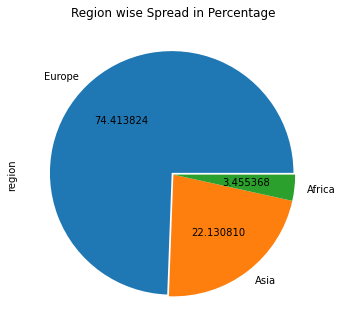

In [25]:
plt.figure(figsize=(12,40))
plt.subplot(121)
df_lumpy['region'].value_counts().plot.pie(autopct="%2f",explode=(0.02,0,0),title = "Region wise Spread in Percentage")
plt.show()

### 2.Country

In [26]:
df_lumpy['country'].nunique()
# 1.There are total 37 country who are suffered by Lumy Skin Disease which are belongs to 

37

In [27]:
pd.DataFrame(df_lumpy['country'].unique())

0
0                    Bangladesh
1                         India
2                         China
3                        Israel
4            Russian Federation
5                     West Bank
6          Syrian Arab Republic
7                       Georgia
8                       Namibia
9                    Montenegro
10                       Greece
11                       Angola
12                      Albania
13                   Kazakhstan
14              North Macedonia
15                       Serbia
16                     Bulgaria
17                      Burundi
18                 Saudi Arabia
19                      Armenia
20                       Cyprus
21                       Kuwait
22  Iran  (Islamic Republic of)
23                   Azerbaijan
24                       Turkey
25                        Egypt
26                         Iraq
27                      Lebanon
28                       Jordan
29                       Guinea
30                    Sri Lanka
31                     Viet Nam
32                      Myanmar
33               Hong Kong, SAR
34                     Djibouti
35                       Bhutan
36                        Nepal
37                          NaN

In [28]:
## These are the countries in which the disease found

<AxesSubplot:xlabel='region,country'>

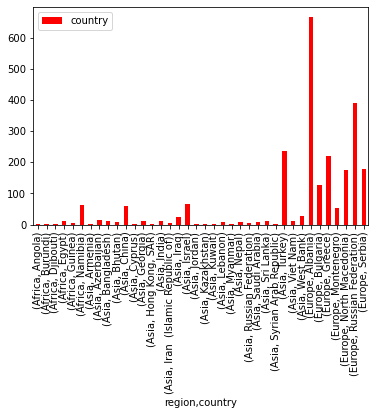

In [29]:
pd.DataFrame(df_lumpy.groupby(['region','country'])['country'].count()).plot(kind="bar",color="red")

In [30]:
pd.DataFrame(df_lumpy.groupby(['region','country'])['country'].count()).rename(columns={'country' : "CountryCount"}) ##.sort_values(by="CountryCount",ascending=False)

CountryCount
region country                                  
Africa Angola                                  1
       Burundi                                 2
       Djibouti                                1
       Egypt                                  10
       Guinea                                  6
       Namibia                                64
Asia   Armenia                                 1
       Azerbaijan                             16
       Bangladesh                             11
       Bhutan                                  7
       China                                  61
       Cyprus                                  2
       Georgia                                10
       Hong Kong, SAR                          1
       India                                  12
       Iran  (Islamic Republic of)             5
       Iraq                                   23
       Israel                                 66
       Jordan                                  2
       Kazakhstan                              2
       Kuwait                                  3
       Lebanon                                 7
       Myanmar                                 1
       Nepal                                   8
       Russian Federation                      4
       Saudi Arabia                            8
       Sri Lanka                              11
       Syrian Arab Republic                    3
       Turkey                                236
       Viet Nam                               10
       West Bank                              28
Europe Albania                               666
       Bulgaria                              127
       Greece                                220
       Montenegro                             52
       North Macedonia                       174
       Russian Federation                    390
       Serbia                                180

In [31]:
## From above table
# 1. From Europe region Top 3 Countries those are higly suffered from Lump skin disease are :
     # 1.Albania - total 858  cases are reported.
     # 2.Russian Federation - total 395 cases are reported.
     # 3.Greece - total 226 - cases are reported.    
    
# 2. From Asian region Top 3 Countries those are higly suffered from Lump skin disease are :    
     # 1.Turkey - Total 237 cases are reported
     # 2.Israel -Total 233 cases are reported.
     # 3.China - Total 71 Cases are reported.   
    
# 3. From African regio Top 3 Countries those are highly suffered from Lump skin disease are :
    # 1.Namibia - Total 68 cases are reported.
    # 2.Egypt -Total 12 cases are reported.
    # 3.Guinea -Total 6 cases are reported.
    
## From above analysis we can say that these countries need to take immediate action.
   ## 1.If it doest not take any action then may be it spread and those animals also get suffered who are not in present time.
    
## Impact :
   ## 1.If they dont take any action they definaly it will spread and the animals will died and the population of animals (cow) would be decreased.
   ## 2.If they population would decrease then those countries would not able to get the milk and milk productions
   ## 3.beacuse of these they need to import it from other countries and then it would be very expensive and if this happends then it will directly impact on ecomomy.
    

## Reporting Date

In [32]:
df_lumpy['reportingDate'] =pd.to_datetime(df_lumpy['reportingDate'])

In [33]:
df_lumpy['Year'] = df_lumpy['reportingDate'].dt.year

In [34]:
pd.DataFrame(df_lumpy['Year'].value_counts().sort_values(ascending=True)).rename(columns={"Year" : "Case Report Count"})

Case Report Count
2011.0                  6
2021.0                 11
2012.0                 21
2013.0                 81
2020.0                 83
2019.0                 83
2018.0                 94
2015.0                129
2017.0                212
2014.0                275
2016.0               1436

### 1.Year  Wise Cases

<AxesSubplot:>

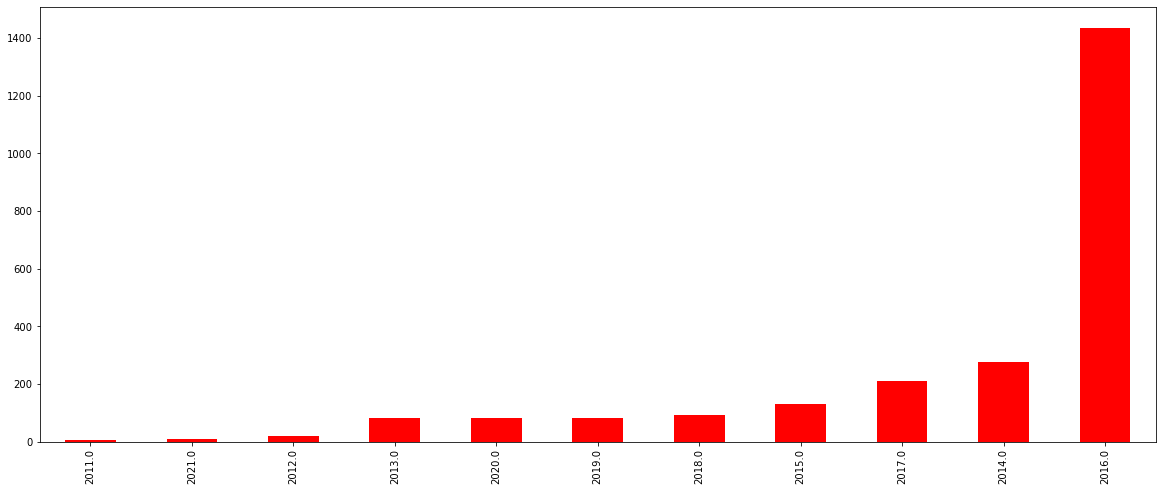

In [35]:
plt.figure(figsize=(20,8))
df_lumpy[df_lumpy['Year'] == df_lumpy['Year']]['Year'].value_counts().sort_values(ascending=True).plot(kind="bar",color="red")

In [36]:
## Obervations from reporting Date
 # 1.First report was registered in 2011.(Based on the data which we have we can say that the first case reported in 2011 year.Indirectly it was born in 2011)
 # 2.After 2011 we can see continuously the reportes were increasing every year.
 # 3.In 2016, the cases of this disease are very high and after 2016 its show like the cases counts were decreased.

In [37]:
df_lumpy['Month'] = df_lumpy['reportingDate'].dt.month
df_lumpy['MonthTitle']= df_lumpy['reportingDate'].dt.month_name()

### 2. Year and Month Wise Cases

In [38]:
pd.DataFrame(df_lumpy.groupby(['Year','Month'])['Month'].count()).rename(columns={'Month':'CaseCounts'})

CaseCounts
Year   Month            
2011.0 7.0             1
       10.0            3
       11.0            2
2012.0 5.0             2
       7.0             2
       8.0             4
       9.0             1
       10.0            3
       11.0            4
       12.0            5
2013.0 1.0             1
       2.0             3
       3.0            10
       4.0            32
       5.0             5
       7.0             4
       8.0             1
       9.0             4
       11.0           16
       12.0            5
2014.0 1.0            11
       2.0             4
       3.0            10
       4.0            50
       5.0            33
       6.0            31
       7.0            93
       8.0            13
       9.0             6
       10.0           19
       11.0            2
       12.0            3
2015.0 1.0             1
       2.0             6
       3.0             2
       4.0            10
       5.0             1
       8.0            16
       9.0            65
       10.0           28
2016.0 1.0            55
       2.0            46
       3.0            12
       4.0            93
       5.0           182
       6.0           187
       7.0           281
       8.0           146
       9.0           208
       10.0           92
       11.0           84
       12.0           50
2017.0 1.0            31
       2.0            12
       3.0            10
       4.0            14
       5.0            18
       6.0            33
       7.0            36
       8.0            33
       9.0             4
       10.0           10
       11.0            4
       12.0            7
2018.0 1.0            24
       3.0            15
       5.0             2
       7.0            23
       8.0             9
       9.0            11
       10.0            5
       11.0            3
       12.0            2
2019.0 3.0             2
       4.0             8
       6.0             3
       7.0            11
       8.0            12
       9.0            14
       10.0           22
       11.0            3
       12.0            8
2020.0 3.0             1
       4.0             1
       5.0             1
       6.0             2
       7.0            13
       8.0            27
       9.0             8
       10.0           13
       11.0            7
       12.0           10
2021.0 1.0            11

In [39]:
df_lumpy.pivot_table(index=['Month','MonthTitle'],columns=['Year','region'],values=['lumpy'],aggfunc='count')

lumpy                                                        \
Year             2011.0 2012.0 2013.0       2014.0       2015.0        2016.0   
region           Africa   Asia Africa  Asia Africa  Asia   Asia Europe Africa   
Month MonthTitle                                                                
1.0   January       NaN    NaN    NaN   1.0    NaN  11.0    1.0    NaN    2.0   
2.0   February      NaN    NaN    NaN   3.0    NaN   4.0    NaN    6.0    NaN   
3.0   March         NaN    NaN    NaN  10.0    NaN  10.0    NaN    2.0    NaN   
4.0   April         NaN    NaN    NaN  32.0    NaN  50.0    2.0    8.0    NaN   
5.0   May           NaN    2.0    NaN   5.0    NaN  33.0    1.0    NaN    NaN   
6.0   June          NaN    NaN    NaN   NaN    NaN  31.0    NaN    NaN    NaN   
7.0   July          1.0    2.0    NaN   4.0    NaN  93.0    NaN    NaN    2.0   
8.0   August        NaN    4.0    1.0   NaN    NaN  13.0    1.0   15.0    NaN   
9.0   September     NaN    1.0    NaN   4.0    6.0   NaN    2.0   63.0    2.0   
10.0  October       3.0    3.0    NaN   NaN    NaN  19.0    NaN   28.0    NaN   
11.0  November      2.0    4.0    NaN  16.0    NaN   2.0    NaN    NaN    NaN   
12.0  December      NaN    5.0    4.0   1.0    NaN   3.0    NaN    NaN    NaN   

                                                                           \
Year                         2017.0             2018.0             2019.0   
region           Asia Europe Africa Asia Europe Africa Asia Europe   Asia   
Month MonthTitle                                                            
1.0   January     1.0   52.0    NaN  NaN   31.0    NaN  NaN   24.0    NaN   
2.0   February    2.0   44.0    NaN  NaN   12.0    NaN  NaN    NaN    NaN   
3.0   March       NaN   12.0    4.0  NaN    6.0    NaN  3.0   12.0    1.0   
4.0   April       NaN   93.0    9.0  NaN    5.0    NaN  NaN    NaN    5.0   
5.0   May         NaN  182.0    1.0  NaN   17.0    NaN  NaN    2.0    NaN   
6.0   June        NaN  187.0    2.0  NaN   31.0    NaN  NaN    NaN    2.0   
7.0   July        6.0  273.0   15.0  1.0   20.0   10.0  NaN   13.0    8.0   
8.0   August      2.0  144.0   19.0  NaN   14.0    NaN  1.0    8.0    4.0   
9.0   September   NaN  206.0    NaN  NaN    4.0    NaN  NaN   11.0    8.0   
10.0  October     NaN   92.0    NaN  NaN   10.0    NaN  1.0    4.0   21.0   
11.0  November    NaN   84.0    NaN  NaN    4.0    NaN  1.0    2.0    3.0   
12.0  December    NaN   50.0    NaN  NaN    7.0    NaN  NaN    2.0    2.0   

                                             
Year                    2020.0       2021.0  
region           Europe Africa  Asia   Asia  
Month MonthTitle                             
1.0   January       NaN    NaN   NaN   11.0  
2.0   February      NaN    NaN   NaN    NaN  
3.0   March         1.0    NaN   1.0    NaN  
4.0   April         3.0    NaN   1.0    NaN  
5.0   May           NaN    NaN   1.0    NaN  
6.0   June          1.0    NaN   2.0    NaN  
7.0   July          3.0    NaN  13.0    NaN  
8.0   August        8.0    NaN  27.0    NaN  
9.0   September     6.0    NaN   8.0    NaN  
10.0  October       1.0    NaN  13.0    NaN  
11.0  November      NaN    1.0   6.0    NaN  
12.0  December      6.0    NaN  10.0    NaN

In [40]:
## From the above pivot table we can check that in which year ,month,region wise how many cases were registered.
## the red mark defines that there were no case registered in that particular month

### 3.cld

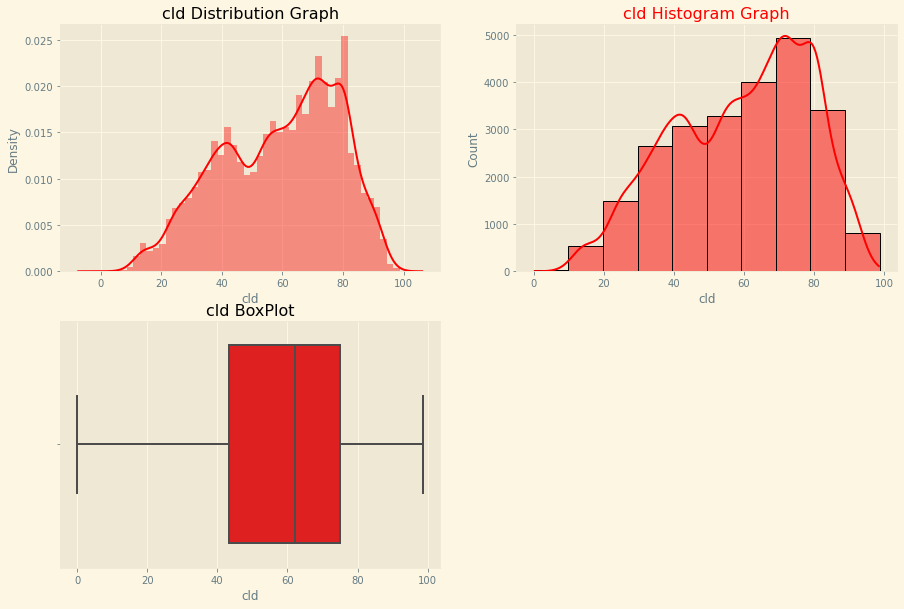

In [41]:
plotGraph(df_lumpy,'cld')

In [42]:
## the Observation for cld
# 1. the cld parameter values are look like not normally distrbuted. The values (max.data points parameter values) are inclined to right hand side.
# i.e the distrubution is negative skewed beacause the Mode > Median > Mean.
# 2. Beacause of one sided skewed like Mode is greated then may be we have some outliers in CLD featuer.
# 3.We have multiple bell curve.
# 4.In boxplot we don't have outlier's even the max. values are inclined to right had side.

### 4. dtr

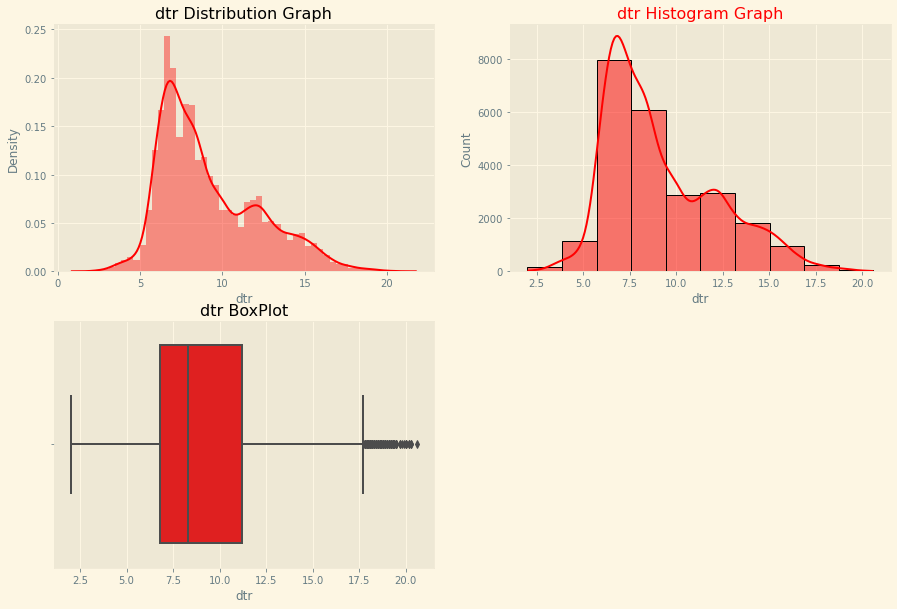

In [43]:
plotGraph(df_lumpy,'dtr')

In [44]:
## the Observation for dtr
# 1. the dtr parameter values are look like not normally distrbuted. The values (max.data points parameter values) are inclined to left hand side.
# i.e the distrubution is negative skewed beacause the Mode < Median < Mean.
# 3.We have multiple bell curve.
# 4.In boxplot we have outlier's in Upper Limit for dtr Features.

In [45]:
df_lumpy.columns

Index(['Longitude', 'Latitude', 'region', 'country', 'reportingDate', 'cld',
       'dtr', 'frs', 'pet', 'pre', 'tmn', 'tmp', 'tmx', 'vap', 'wet',
       'elevation', 'dominant_land_cover', 'X5_Ct_2010_Da', 'X5_Bf_2010_Da',
       'lumpy', 'Year', 'Month', 'MonthTitle'],
      dtype='object')

In [46]:
df_lumpy.head()

Longitude   Latitude region     country reportingDate   cld   dtr    frs  \
0  90.380931  22.437184   Asia  Bangladesh    2020-10-09  41.6  12.8   0.00   
1  87.854975  22.986757   Asia       India    2019-12-20  40.5  13.3   0.00   
2  85.279935  23.610181   Asia       India    2019-12-20  27.3  13.6   0.08   
3  81.564510  43.882221   Asia       China    2019-10-25  45.3  12.8  31.00   
4  81.161057  43.834976   Asia       China    2019-10-25  38.8  13.2  31.00   

   pet   pre   tmn   tmp   tmx   vap   wet  elevation  dominant_land_cover  \
0  2.3   1.7  12.7  19.1  25.5  15.7  0.00        147                    2   
1  2.4   0.0  13.2  19.8  26.5  16.3  0.00        145                    2   
2  2.3   0.6   9.4  16.2  23.0  13.0  0.98        158                    2   
3  0.4   8.8 -22.5 -16.1  -9.7   0.9  4.64        178                    2   
4  0.4  10.5 -20.4 -13.8  -7.2   1.2  1.69        185                    3   

   X5_Ct_2010_Da  X5_Bf_2010_Da  lumpy    Year  Month MonthTitle  
0   27970.983100    3691.746950      1  2020.0   10.0    October  
1   25063.646690     671.326701      1  2019.0   12.0   December  
2    6038.477155    1426.839831      1  2019.0   12.0   December  
3     760.703340       0.000000      1  2019.0   10.0    October  
4     270.367426       0.000000      1  2019.0   10.0    October

### 5.frs

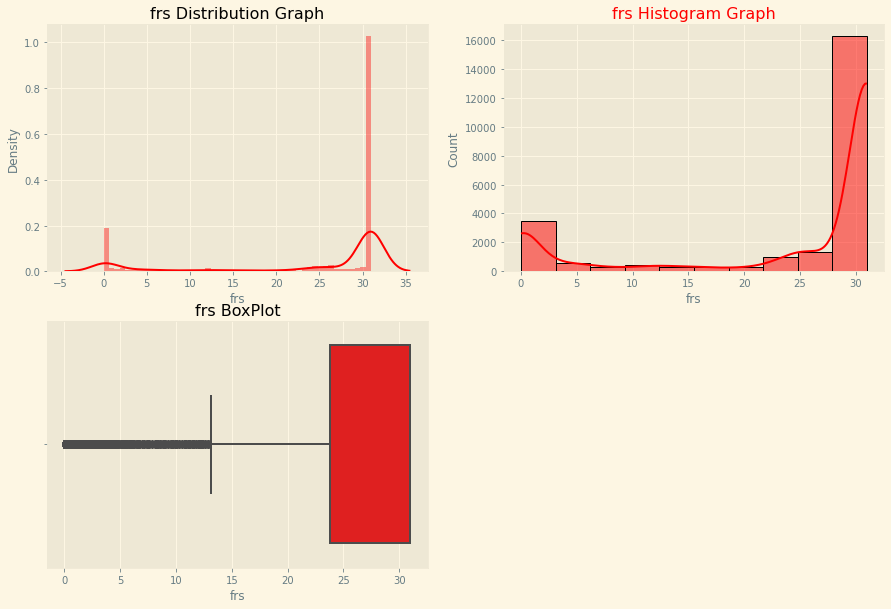

In [47]:
plotGraph(df_lumpy,'frs')

In [48]:
## the Observation for frs
# 1.the frs parameter values are look like not normally distrbuted. 
# 3.We have multiple bell curve.
# 4.In boxplot we have outlier's in lower Limit for dtr Features.
# 5.It looks like the data/value of frs features doesn't show the any pattern.

### 6.pet

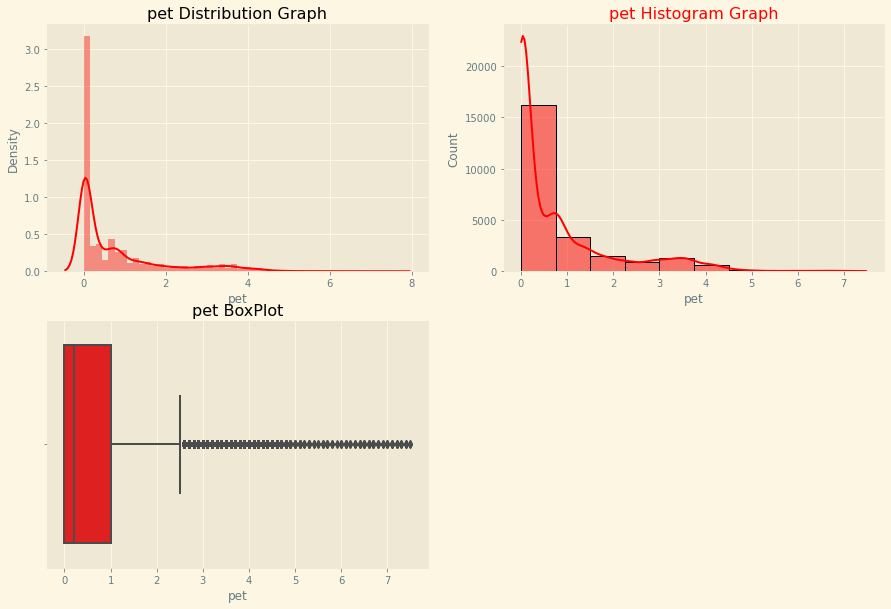

In [49]:
plotGraph(df_lumpy,'pet')

In [50]:
## the Observation for pet
# 1.The distribution of  Pet Feature are look like not normally distrbuted. 
# 2.The distribution skew/ inclinded towards left hand side i.e Positive skewed.
# 3.In boxplot we have outlier's in Upper Limit for dtr Features.

### 7.tmn

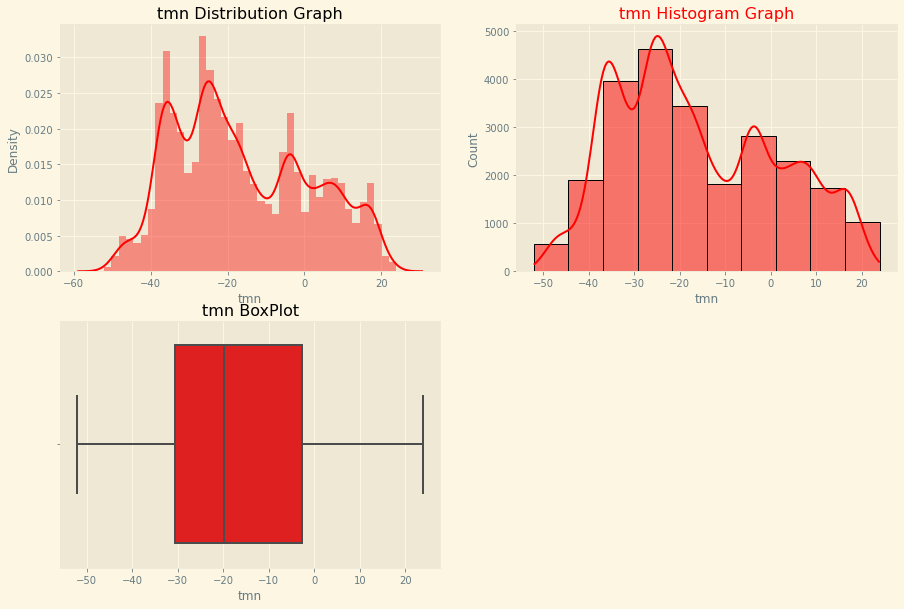

In [51]:
plotGraph(df_lumpy,'tmn')

In [52]:
## the Observation for tmn
# 1.The distribution of  tmn Feature are look like not normally distrbuted. 
# 2.we have lot of variations in distributions. 
# 3.The parameter values are Positive as well as Negative.In dataset we have most of the values in Negative as per Distrubution and histogram graph.
# 2.The distribution skew/ inclinded towards left hand side i.e Positive skewed.
# 3.In boxplot we don't have outlier's tmn Features.

### 8.tmp

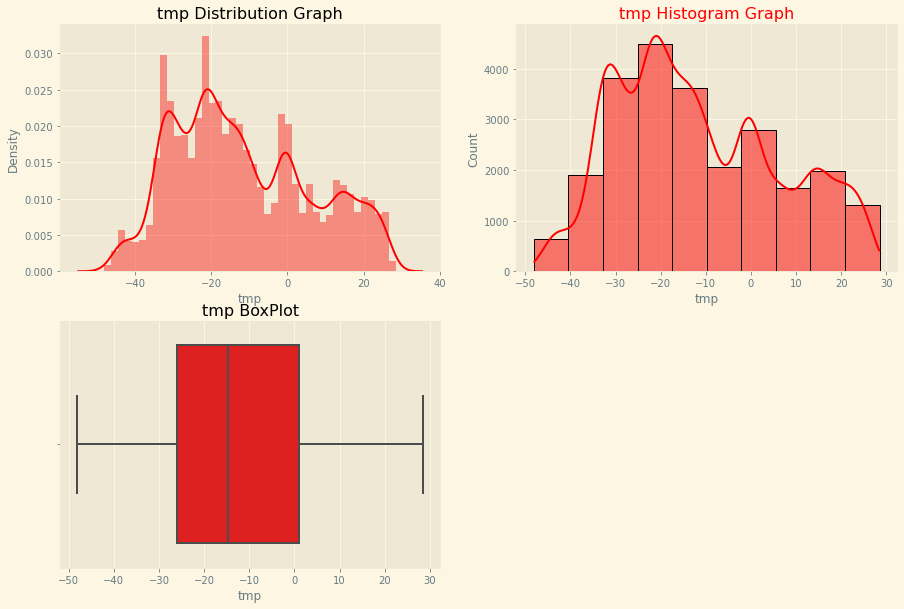

In [53]:
plotGraph(df_lumpy,'tmp')

In [54]:
## the Observation for tmp
# 1.The distribution of  tmp Feature are look like not normally distrbuted. 
# 2.we have lot of variations in distributions. 
# 3.The parameter values are Positive as well as Negative.In dataset we have most of the values in Negative as per Distrubution and histogram graph.
# 2.The distribution skew/ inclinded towards left hand side i.e Positive skewed.
# 3.In boxplot we don't have outlier's tmp Features.

### 9. tmx

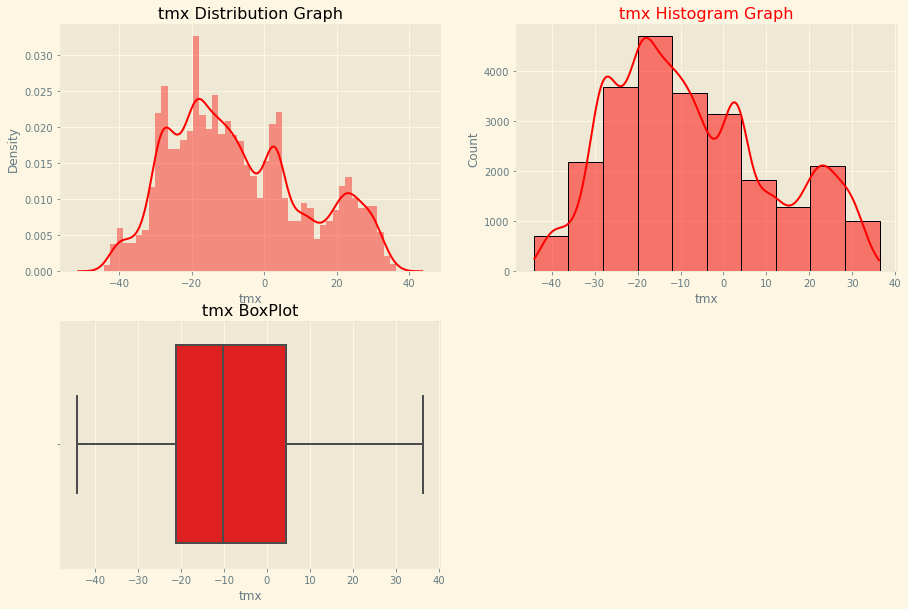

In [55]:
plotGraph(df_lumpy,'tmx')

In [56]:
## the Observation for tmx
# 1.The distribution of  tmx Feature are look like not normally distrbuted. 
# 2.we have lot of variations in distributions. 
# 3.The parameter values are Positive as well as Negative.In dataset we have most of the values in Negative as per Distrubution and histogram graph.
# 2.The distribution skew/ inclinded towards left hand side i.e Positive skewed.
# 3.In boxplot we don't have outlier's tmp Features.

### 10.vap

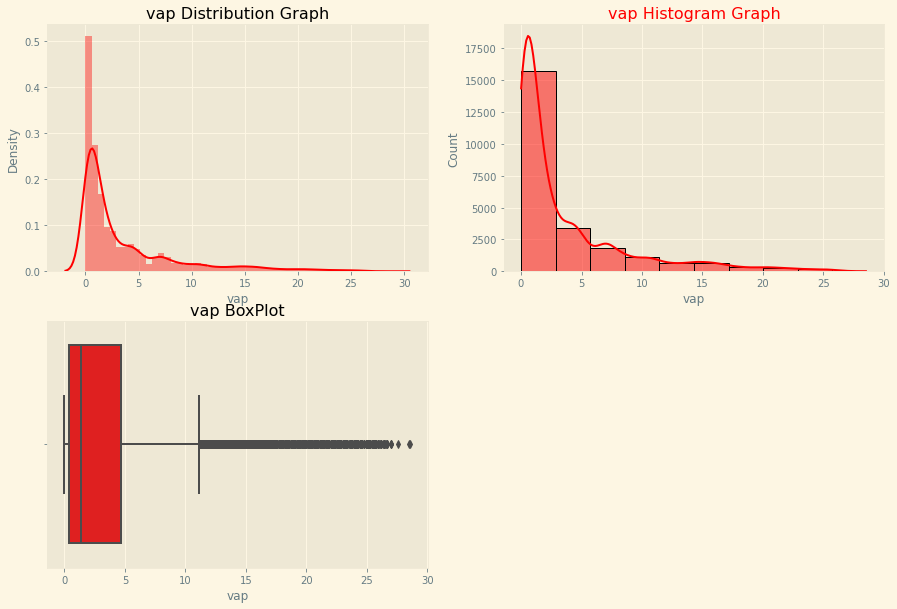

In [57]:
plotGraph(df_lumpy,'vap')

In [58]:
## the Observation for vap
# 1.The distribution of  Vap Feature are look like not normally distrbuted. 
# 2.The distribution skew/ inclinded towards left hand side i.e Positive skewed.
# 3.In boxplot we have outlier's in Upper Limit for dtr Features.

### 11.vap

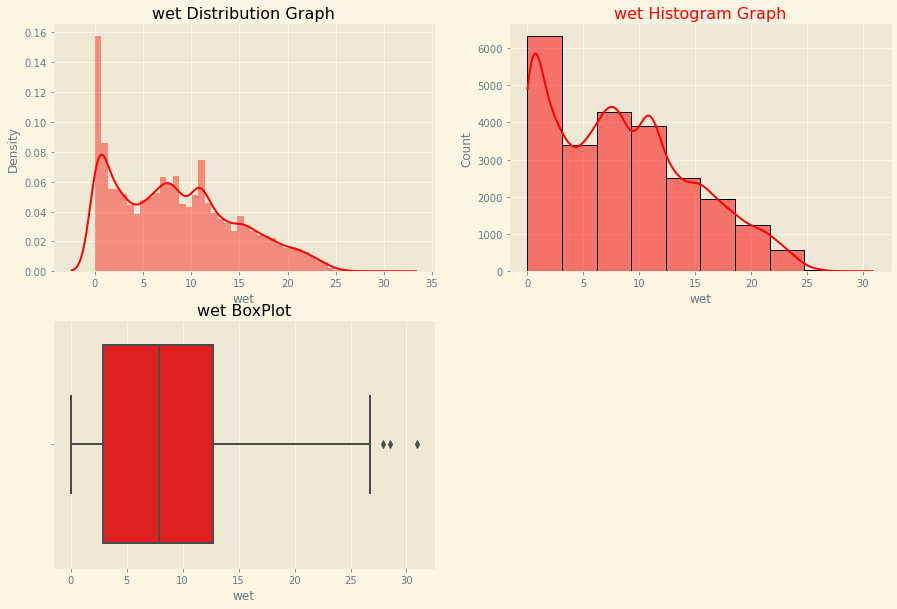

In [59]:
plotGraph(df_lumpy,'wet')

In [60]:
## the Observation for wer
# 1.The distribution of  Pet Feature are look like not normally distrbuted. 
# 2.The distribution skew/ inclinded towards left hand side i.e Positive skewed.
# 3.We have multiple bell curve in distribution,may be mode and median values are repeatating almost same.
# 3.In boxplot we have outlier's in Upper Limit for dtr Features.

### 12.elevation

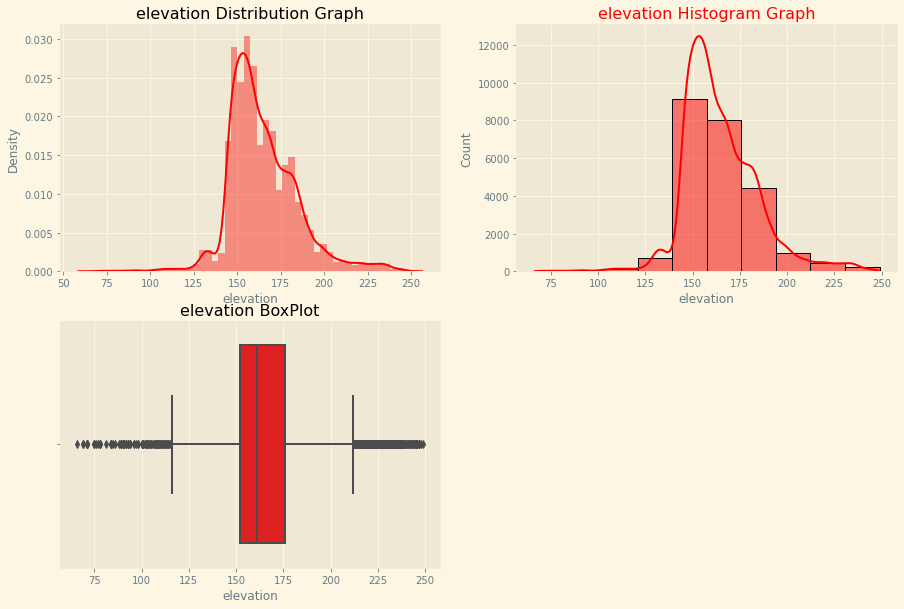

In [61]:
plotGraph(df_lumpy,'elevation')

In [62]:
## Observation of Elevation Feature
# 1.The distribution looks like it has kind of normal distribution.
# 2.We have outliers in both side i.e Lower and Upper Limit.

### 13.dominant_land_cover

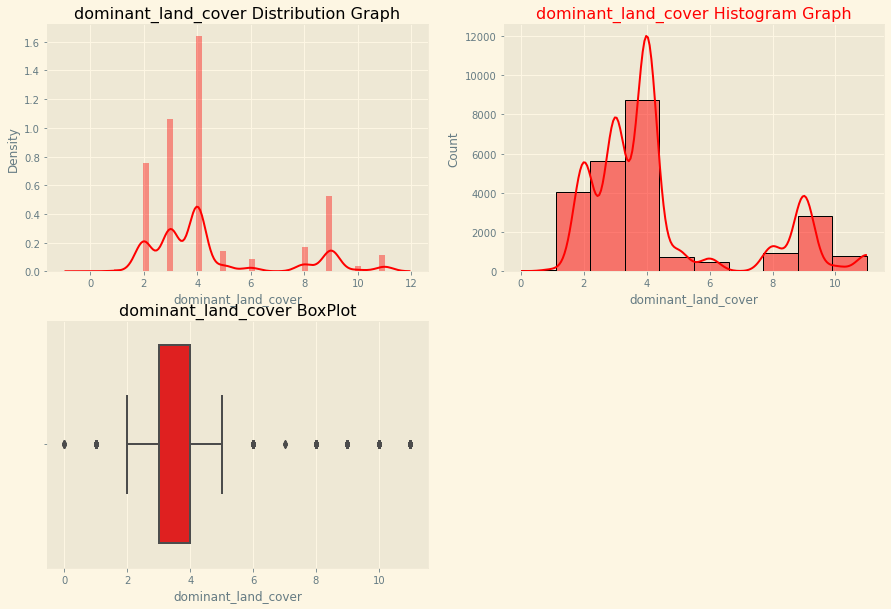

In [63]:
plotGraph(df_lumpy,'dominant_land_cover')

In [64]:
## Observation for dominant_land_cover
# 1.It is not normally distributed.
# 2.We can see the variations in parameter values.
# 3.We have outliers in dominant_land_cover features i.e Lower and Upper Limit.

### 14.X5_Ct_2010_Da

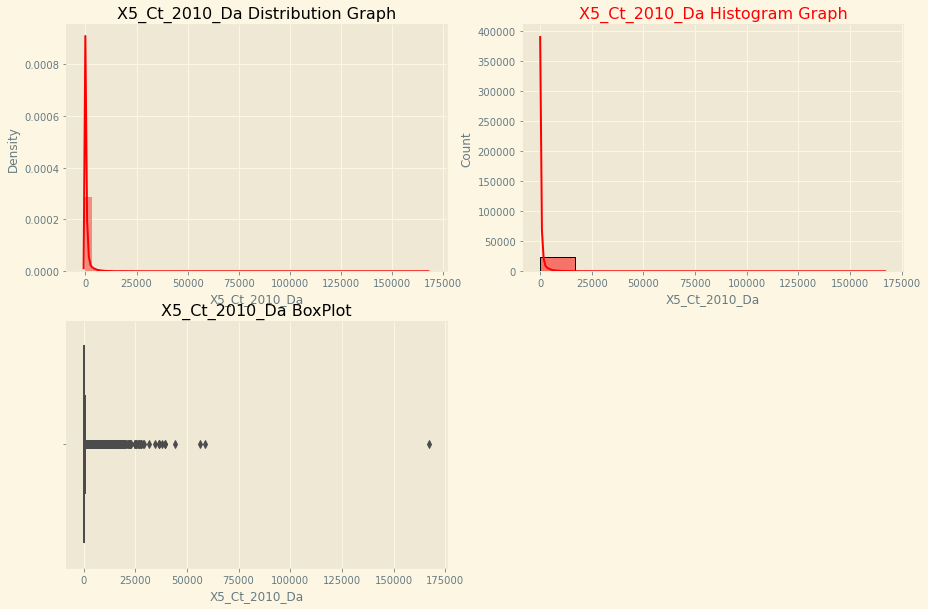

In [65]:
plotGraph(df_lumpy,'X5_Ct_2010_Da')

In [66]:
## Observation for X5_Ct_2010_Da
# 1.It is not normally distributed.
# 3.We have outliers in X5_Ct_2010_Da features i.e Upper Limit.

### 15.X5_Bf_2010_Da

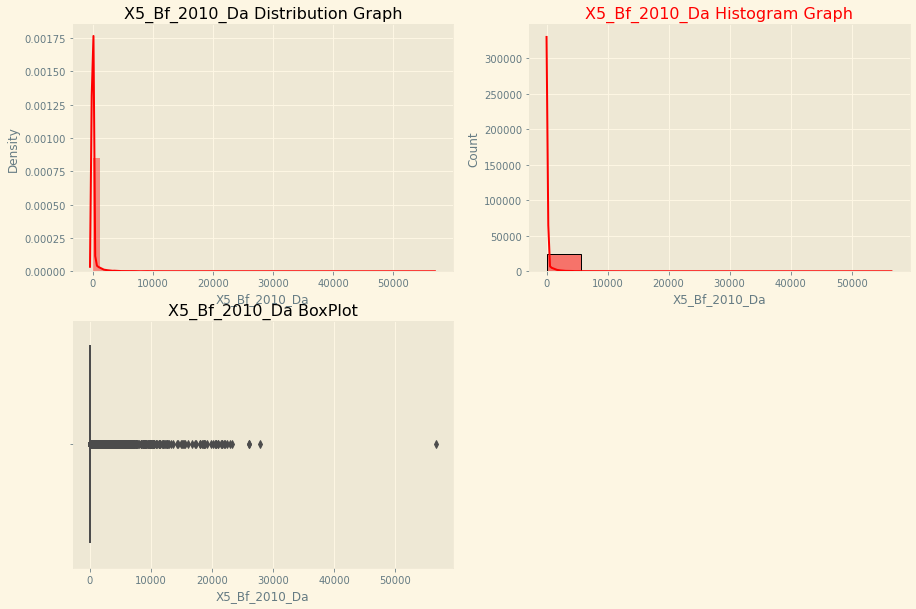

In [67]:
plotGraph(df_lumpy,'X5_Bf_2010_Da')

In [68]:
## Observation for X5_Bf_2010_Da
# 1.It is not normally distributed.
# 3.We have outliers in X5_Bf_2010_Da features i.e Upper Limit.

In [69]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


### Bi- Varient Data Analysis

<h2> 1 .cld vs lumpy (Independent Vs Target Feature - Probability) </h2>

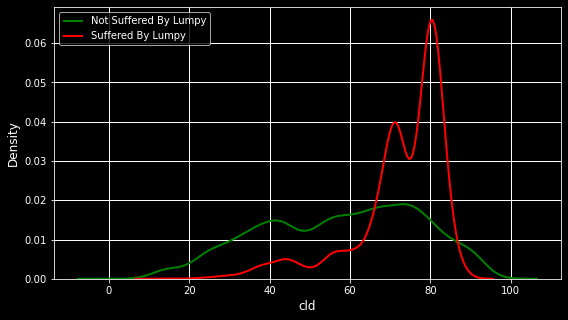

In [70]:
plotChart(df_lumpy,'lumpy','cld')

<h1> Observation On above Chart.(For CLD) </h1>

<strong>The Probability is High <span style="color:green"> &#8657; For Not Suffered By Lumpy. </span> </strong>
    <div>
        <ol>
            <li> If the values are lie in between min value upto 65 (near by) </li>
            <li> If the values are lie in between 85 upto more than 100 (based on available dataset values) </li>
        </ol>
    </div>
<hr>        
<strong> The Probability is Low <span style="color:green"> &#8659; For Not Suffered By Lumpy.</span> </strong>    
    <div>
        <ol>
            <li>if the value lie between above 65 and less than or equal to 85</li>
        </ol>
    </div>
<hr>

<strong> The Probability is High <span style="color:red"> &#8657; For Suffered By Lumpy.</span> </strong>  
    <div>
        <ol>
            <li>
                If the values are lie in between 85 upto more than 100 (based on available dataset values)
            </li>
        </ol>
    </div>
<hr>    

<strong>The Probability is Low <span style="color:red"> &#8659; For Suffered By Lumpy. </span> </strong>
    <div>
        <ol>
            <li> If the values are lie in between min value upto 65 (near by) </li>
            <li> If the values are lie in between 85 upto more than 100 (based on available dataset values) </li>
        </ol>
    </div>

<h2> 2. dtr vs lumpy (Independent Vs Target Feature - Probability) </h1>

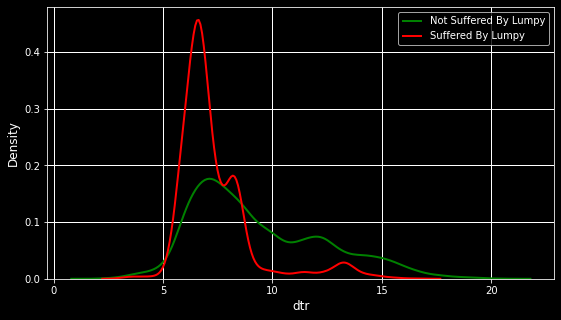

In [71]:
plotChart(df_lumpy,'lumpy','dtr')

 <h1>Probability observation for dtr.</h1> 
 
  <strong> The Probability is High -<span style="color:green"> &#8657; For Not Suffered By Lumpy. </span></strong>
      <div>
            <ol>    
               <li>If the values are lie in-between 0 upto 6.  </li>
               <li>If the values are lie in-between 8 to 20.  </li>
            </ol>
      </div>
<hr> 
<strong> The Probability is Low <span style="color:green"> &#8659; For Not Suffered By Lumpy.</span> </strong>  
     <div>
         <ol>
               <li> If the values are lie in-between 6 to 8.</li>
         </ol>
    </div>
<hr>
<strong> The Probability is High <span style="color:red"> &#8657; For Suffered By Lumpy.</span> </strong> 
    <div>
         <ol>
              <li>If the values are lie in between 6 to 8 (near by).</li>
         </ol>     
    <div>  
<hr>        
<strong>The Probability is Low <span style="color:red"> &#8659; For Suffered By Lumpy. </span> </strong>
<div>
    <ol>
        <li>If the values are lie in-between 0 upto 6.</li>
        <li>If the values are lie in-between 8 to 20.</li>
    </ol>
<div>    

<h2> 3. frs vs lumpy (Independent Vs Target Feature - Probability) </h1>

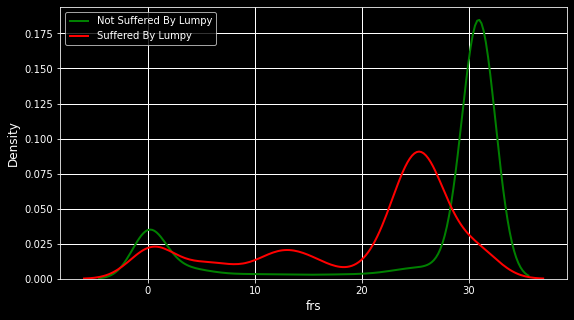

In [72]:
plotChart(df_lumpy,'lumpy','frs')

<h1>Probability observations for frs parameter </h1>

<strong>The Probability is High <span style="color:green"> &#8657; For Not Suffered By Lumpy. </span> </strong>
    <div>
        <ol>
            <li>If the values are lie between near by 28 to 35 and more (based on current data)</li>
        </ol>
    </div>    
<hr>        
<strong> The Probability is Low <span style="color:green"> &#8659; For Not Suffered By Lumpy.</span> </strong>    
    <div>
        <ol>
            <li>if the value lie between above 1 and less than or equal to 27-28</li>
        </ol>
    </div>
<hr>
<strong> The Probability is High <span style="color:red"> &#8657; For Suffered By Lumpy.</span> </strong> 
    <div>
         <ol>
              <li>if the value lie between above 1 and less than or equal to 27-28</li>
         </ol>     
    <div>  
<hr>
        
<strong>The Probability is Low <span style="color:red"> &#8659; For Suffered By Lumpy. </span> </strong>
<div>
    <ol>
        <li>If the values are lie between near by 28 to 35 and more (based on current data)</li>
    </ol>
<div> 

<h2> 4. pet vs lumpy (Independent Vs Target Feature - Probability) </h1>

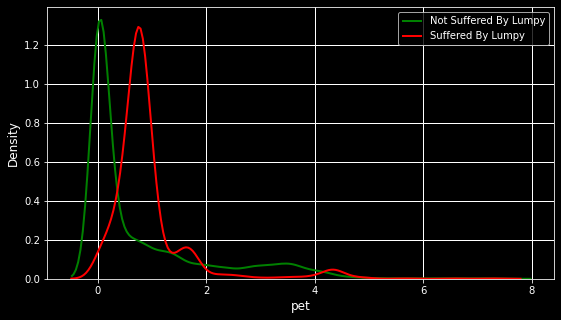

In [73]:
plotChart(df_lumpy,'lumpy','pet')

<h1>Probability observations for pet parameter </h1>

<strong>The Probability is High <span style="color:green"> &#8657; For Not Suffered By Lumpy. </span> </strong>
    <div>
        <ol>
            <li>If the values are from 0 to 1 (based on current data)</li>
            <li>If the values are from 2 to 4 (based on current data)</li>
        </ol>
    </div>    
<hr>        
<strong> The Probability is Low <span style="color:green"> &#8659; For Not Suffered By Lumpy.</span> </strong>    
    <div>
        <ol>
            <li>if the value lie between 1 to 2</li>
        </ol>
    </div>
<hr>
<strong> The Probability is High <span style="color:red"> &#8657; For Suffered By Lumpy.</span> </strong> 
    <div>
         <ol>
              <li>if the value lie between 1 to 2</li>
         </ol>     
    <div>  
<hr>
        
<strong>The Probability is Low <span style="color:red"> &#8659; For Suffered By Lumpy. </span> </strong>
<div>
    <ol>
         <li>If the values are from 0 to 1 (based on current data)</li>
         <li>If the values are from 2 to 4 (based on current data)</li>
    </ol>
<div> 

<h2> 5. pre vs lumpy (Independent Vs Target Feature - Probability) </h2>

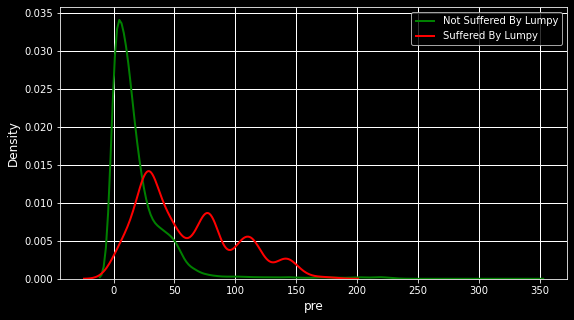

In [74]:
plotChart(df_lumpy,'lumpy','pre')

<h1>Probability observations for per parameter </h1>

<strong>The Probability is High <span style="color:green"> &#8657; For Not Suffered By Lumpy. </span> </strong>
    <div>
        <ol>
            <li>If the values are from 0.1 to 25 near-by (based on current data)</li>
        </ol>
    </div>    
<hr>        
<strong> The Probability is Low <span style="color:green"> &#8659; For Not Suffered By Lumpy.</span> </strong>    
    <div>
        <ol>
            <li>If the value lie between 25  upto 350</li>
        </ol>
    </div>
<hr>
<strong> The Probability is High <span style="color:red"> &#8657; For Suffered By Lumpy.</span> </strong> 
    <div>
         <ol>
              <li>If the value lie between 25  upto 350</li>
         </ol>     
    <div>  
<hr>
        
<strong>The Probability is Low <span style="color:red"> &#8659; For Suffered By Lumpy. </span> </strong>
<div>
    <ol>
        <li>If the values are from 0.1 to 25 near-by (based on current data)</li>
    </ol>
<div> 

<h2> 6. tmn vs lumpy (Independent Vs Target Feature - Probability) </h2>

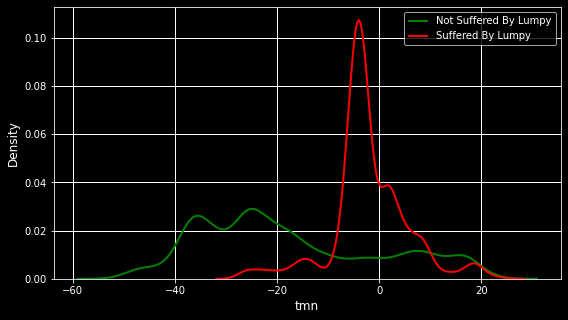

In [75]:
plotChart(df_lumpy,'lumpy','tmn')

<h2> 7. tmp vs lumpy (Independent Vs Target Feature - Probability) </h2>

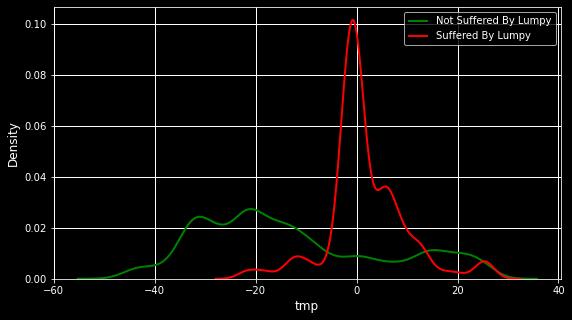

In [76]:
plotChart(df_lumpy,'lumpy','tmp')

<h2> 8. tmx vs lumpy (Independent Vs Target Feature - Probability) </h2>

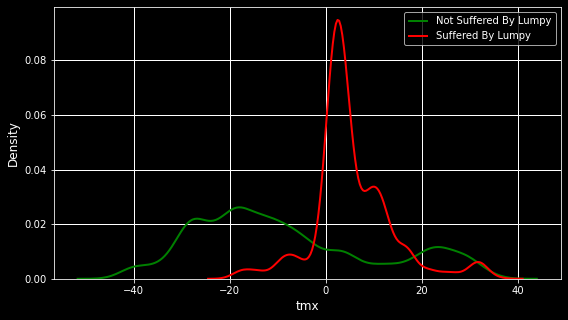

In [77]:
plotChart(df_lumpy,'lumpy','tmx')

<h2> 9. vap vs lumpy (Independent Vs Target Feature - Probability) </h2>

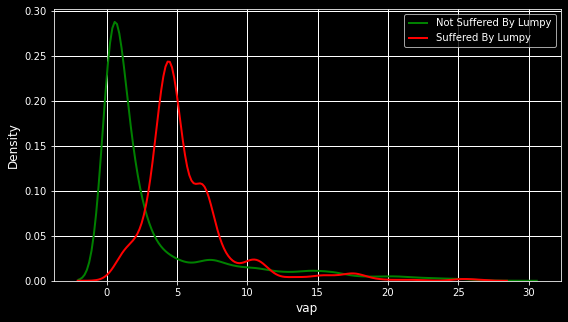

In [78]:
plotChart(df_lumpy,'lumpy','vap')

<h2> 10. wet vs lumpy (Independent Vs Target Feature - Probability) </h2>

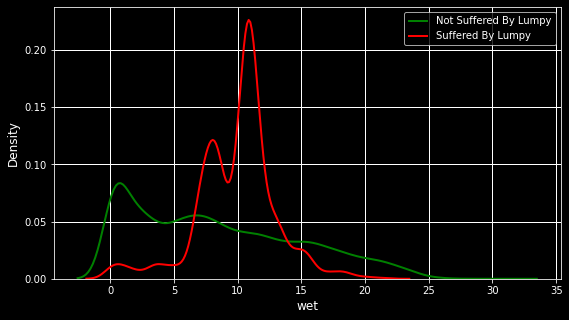

In [79]:
plotChart(df_lumpy,'lumpy','wet')

<h2> 11. elevation vs lumpy (Independent Vs Target Feature - Probability) </h2>

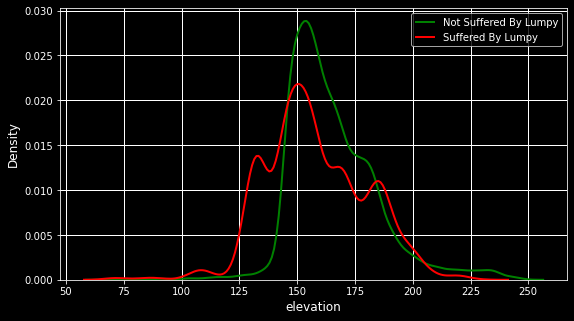

In [80]:
plotChart(df_lumpy,'lumpy','elevation')

<h2> 12. dominant_land_cover vs lumpy (Independent Vs Target Feature - Probability) </h2>

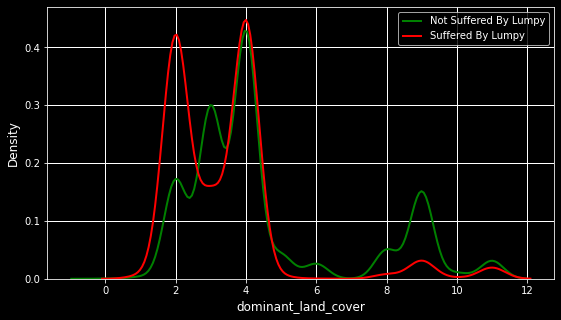

In [81]:
plotChart(df_lumpy,'lumpy','dominant_land_cover')

###  Base Line Model

In [82]:
## Decalre dependent and independent variables

#df_lumpy.columns

X = df_lumpy.drop(columns=['lumpy', 'Year', 'Month', 'MonthTitle','dominant_land_cover','reportingDate','region','country'])
y =df_lumpy[['lumpy']]


In [83]:
y.head()

lumpy
0      1
1      1
2      1
3      1
4      1

In [84]:
## Import all Classification Algorithm

from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.neighbors  import KNeighborsClassifier # KNN Classifier
from sklearn.naive_bayes import GaussianNB # Naive bayes
from sklearn.tree import DecisionTreeClassifier ## Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC  # Super Vector Machine

In [85]:
LR = LogisticRegression()
KNN = KNeighborsClassifier()
NB = GaussianNB()
DTree = DecisionTreeClassifier()
RF = RandomForestClassifier(n_estimators=500,random_state=42)
svc = SVC(kernel = 'poly')

In [86]:
model = {
    "a":['LogisticRegression',LR],
    "b":['KNeighborsClassifier',KNN],
    "c":['GaussianNB',NB],
    "d":['DecisionTreeClassifier',DTree],
    "e":['RandomForestClassifier',RF],
    "f":['SVC',svc]
}

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [89]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import make_scorer,r2_score

In [90]:
def test_model(model,X_train=X_train,y_train=y_train):
    cv = KFold(n_splits=7,shuffle=True,random_state=54)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model,X_train,y_train,cv=cv,scoring=r2)
    score=[r2_val_score.mean()]
    return score

In [91]:
model_score = []
for mdl in model:
    print("Training Model",model[mdl][0])
    score = test_model(model[mdl][1],X_train,y_train)
    print('Score Of Model :',score)
    model_score.append([model[mdl][0],score])


Training Model LogisticRegression
Score Of Model : [0.2590566685703685]
Training Model KNeighborsClassifier
Score Of Model : [0.5732469921553991]
Training Model GaussianNB
Score Of Model : [0.016120341980212363]
Training Model DecisionTreeClassifier
Score Of Model : [0.6580569865872598]
Training Model RandomForestClassifier
Score Of Model : [0.6985799276044669]


From above model, there are 3 model from where we are getting more than 50% accuracy as a base model and without any data pre-processing.

1.KNN - 57.3%

2.Decision Tree Classifier - 65.90%

3.Random Forest Classifier - 69.85%

### Data Pre-Processing

In [92]:
df_lumpy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24195 entries, 0 to 24802
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Longitude            24195 non-null  float64       
 1   Latitude             24195 non-null  float64       
 2   region               2431 non-null   object        
 3   country              2431 non-null   object        
 4   reportingDate        2431 non-null   datetime64[ns]
 5   cld                  24195 non-null  float64       
 6   dtr                  24195 non-null  float64       
 7   frs                  24195 non-null  float64       
 8   pet                  24195 non-null  float64       
 9   pre                  24195 non-null  float64       
 10  tmn                  24195 non-null  float64       
 11  tmp                  24195 non-null  float64       
 12  tmx                  24195 non-null  float64       
 13  vap                  24195 non-

In [93]:
df_lumpy.isnull().sum()

Longitude                  0
Latitude                   0
region                 21764
country                21764
reportingDate          21764
cld                        0
dtr                        0
frs                        0
pet                        0
pre                        0
tmn                        0
tmp                        0
tmx                        0
vap                        0
wet                        0
elevation                  0
dominant_land_cover        0
X5_Ct_2010_Da              0
X5_Bf_2010_Da              0
lumpy                      0
Year                   21764
Month                  21764
MonthTitle             21764
dtype: int64

In [94]:
percentage_nullValues = df_lumpy.isnull().sum() * 100 / len(df_lumpy)
missing_values = pd.DataFrame({'Column_Name': df_lumpy.columns,
                              'percentage_missing' : percentage_nullValues})
missing_values

Column_Name  percentage_missing
Longitude                      Longitude             0.00000
Latitude                        Latitude             0.00000
region                            region            89.95247
country                          country            89.95247
reportingDate              reportingDate            89.95247
cld                                  cld             0.00000
dtr                                  dtr             0.00000
frs                                  frs             0.00000
pet                                  pet             0.00000
pre                                  pre             0.00000
tmn                                  tmn             0.00000
tmp                                  tmp             0.00000
tmx                                  tmx             0.00000
vap                                  vap             0.00000
wet                                  wet             0.00000
elevation                      elevation             0.00000
dominant_land_cover  dominant_land_cover             0.00000
X5_Ct_2010_Da              X5_Ct_2010_Da             0.00000
X5_Bf_2010_Da              X5_Bf_2010_Da             0.00000
lumpy                              lumpy             0.00000
Year                                Year            89.95247
Month                              Month            89.95247
MonthTitle                    MonthTitle            89.95247

There are 6 columns/feature where we have nan/missing values and the percentage of missing values are 89%.So we will drop are these 6 columns.
<ol>
    <li>region</li>
    <li>country</li>
    <li>reportingdate</li>
    <li>Year</li>
    <li>Month</li>
    <li>MonthTitle</li>
</ol>    
    

#### Lets drop null / nan values and same columns also

In [95]:
drop_featureList = ["region","country","reportingDate","Year","Month","MonthTitle"]

In [96]:
df_lumpy.drop(columns=drop_featureList,inplace=True)

In [97]:
df_lumpy.head()

Longitude   Latitude   cld   dtr    frs  pet   pre   tmn   tmp   tmx   vap  \
0  90.380931  22.437184  41.6  12.8   0.00  2.3   1.7  12.7  19.1  25.5  15.7   
1  87.854975  22.986757  40.5  13.3   0.00  2.4   0.0  13.2  19.8  26.5  16.3   
2  85.279935  23.610181  27.3  13.6   0.08  2.3   0.6   9.4  16.2  23.0  13.0   
3  81.564510  43.882221  45.3  12.8  31.00  0.4   8.8 -22.5 -16.1  -9.7   0.9   
4  81.161057  43.834976  38.8  13.2  31.00  0.4  10.5 -20.4 -13.8  -7.2   1.2   

    wet  elevation  dominant_land_cover  X5_Ct_2010_Da  X5_Bf_2010_Da  lumpy  
0  0.00        147                    2   27970.983100    3691.746950      1  
1  0.00        145                    2   25063.646690     671.326701      1  
2  0.98        158                    2    6038.477155    1426.839831      1  
3  4.64        178                    2     760.703340       0.000000      1  
4  1.69        185                    3     270.367426       0.000000      1

### Let's Check the target column (lumpy) status (whether it is balanced or not )

In [98]:
df_lumpy['lumpy'].value_counts()

0    21764
1     2431
Name: lumpy, dtype: int64

<AxesSubplot:>

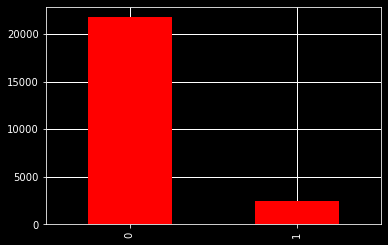

In [99]:
df_lumpy['lumpy'].value_counts().plot(kind="bar",color="red")

From above char we can say that, 
<ul>
    <li>The data in target column is imbalanced. and if we go with the imbalanced data then it will impact on the validation data and same on the Prediction. </li>    
    <li>If we keep the same imbalanced data then we will also get the one sided prediction.</li>
    <li style="color:red"><strong>We have to balance the target column data using SMOTE technique. where this technique will add some synthetic data to balance the data</strong></li>
</ul>    

In [100]:
!pip install imblearn --user
#!pip install -U imbalanced-learn

* <strong style="color:red"> We will Use SMOTE to balance data after splitting data into dependent,independent variables and data into train,test.</strong>

### Split data into dependent,independent variables

In [106]:
df_lumpy.columns
X = df_lumpy.drop(columns=['lumpy','dominant_land_cover'])
y = df_lumpy[['lumpy']]

### Split data into train and test

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [112]:
X_train.shape , X_test.shape,y_train.shape,y_test.shape

((19356, 15), (4839, 15), (19356, 1), (4839, 1))

In [128]:
df_lumpy.tail()

Longitude  Latitude   cld   dtr  frs  pet    pre   tmn   tmp   tmx  \
24798      20.25    -16.75  68.8  12.0  0.0  3.6  172.0  17.7  23.7  29.7   
24799      20.75    -16.75  68.8  11.8  0.0  3.6  170.0  18.0  23.9  29.8   
24800      21.25    -16.75  68.8  11.6  0.0  3.6  167.5  18.3  24.1  29.9   
24801      21.75    -16.75  68.8  11.5  0.0  3.6  169.5  18.5  24.2  30.0   
24802      22.25    -16.75  67.5  11.4  0.0  3.7  172.1  18.7  24.4  30.1   

        vap    wet  elevation  dominant_land_cover  X5_Ct_2010_Da  \
24798  22.4  15.60        184                    3      95.184093   
24799  23.2  15.70        182                    4     111.561489   
24800  23.9  15.87        178                    5     109.733287   
24801  24.2  16.30        180                    3     103.753469   
24802  24.5  16.67        179                    3      85.084645   

       X5_Bf_2010_Da  lumpy  
24798            0.0      0  
24799            0.0      0  
24800            0.0      0  
24801            0.0      0  
24802            0.0      0

In [114]:
y_train.value_counts()

lumpy
0        17392
1         1964
dtype: int64

In [115]:
y_test.value_counts()

lumpy
0        4372
1         467
dtype: int64

In [116]:
## SMOTE

In [117]:
from imblearn.over_sampling import SMOTE

In [132]:
sm = SMOTE(random_state=42)
X_train_new,y_train_new = sm.fit_resample(X_train,y_train)

In [131]:
## Lets Build the model

In [133]:
model_score = []
for mdl in model:
    print("Training Model",model[mdl][0])
    score = test_model(model[mdl][1],X_train_new,y_train_new)
    print('Score Of Model :',score)
    model_score.append([model[mdl][0],score])


Training Model LogisticRegression
Score Of Model : [0.4483416417050515]
Training Model KNeighborsClassifier
Score Of Model : [0.8318688377721281]
Training Model GaussianNB
Score Of Model : [0.5371220853433168]
Training Model DecisionTreeClassifier
Score Of Model : [0.8783291763381074]
Training Model RandomForestClassifier
Score Of Model : [0.9077689445646918]


In [134]:
## Random Forest Classifier
modelRF = RF.fit(X_train_new,y_train_new)
y_test['RF_Predict'] =  modelRF.predict(X_test)


In [138]:
## Decision Tree
modelDT = DTree.fit(X_train_new,y_train_new)
y_test['DT_Predict'] = modelDT.predict(X_test)

In [139]:
## GaussianNB
modelNB = NB.fit(X_train_new,y_train_new)
y_test['NB_Predict'] = modelNB.predict(X_test)

In [143]:
## KNN
modelKNN = KNN.fit(X_train_new,y_train_new)
y_test['KNN_Predict'] = modelKNN.predict(X_test)

In [144]:
y_test.head()

lumpy  RF_Predict  DT_Predict  NB_Predict  KNN_Predict
8944       0           0           0           0            0
8064       0           0           0           0            0
23834      0           0           0           0            0
19235      0           0           1           0            0
19472      0           0           0           0            0

In [145]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [160]:
## Random Forest Classifier - Accuracy
print("Random Forest Classifier - Accuracy",accuracy_score(y_test['lumpy'],y_test['RF_Predict']))

## Random Forest Classifier - Confusion matrix
confusion_matrix(y_test['lumpy'],y_test['RF_Predict'])

Random Forest Classifier - Accuracy 0.964455466005373


array([[4252,  120],
       [  52,  415]], dtype=int64)

In [153]:
## TN -True Negative (No -NO)   FP - False Positive (Yes -No)
## FN -False Negative (No -Yes)  TP - True Positive (Yes-Yes)

In [161]:
## Random Forest Classifier - Classification Report
print(classification_report(y_test['lumpy'],y_test['RF_Predict']))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      4372
           1       0.78      0.89      0.83       467

    accuracy                           0.96      4839
   macro avg       0.88      0.93      0.90      4839
weighted avg       0.97      0.96      0.97      4839



In [162]:
## Decision - Accuracy
print("Decision - Accuracy",accuracy_score(y_test['lumpy'],y_test['DT_Predict']))

## Decision - Confusion matrix
confusion_matrix(y_test['lumpy'],y_test['DT_Predict'])

Decision - Accuracy 0.9578425294482331


array([[4222,  150],
       [  54,  413]], dtype=int64)

In [163]:
## Decision - Classification Report
print(classification_report(y_test['lumpy'],y_test['DT_Predict']))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      4372
           1       0.73      0.88      0.80       467

    accuracy                           0.96      4839
   macro avg       0.86      0.93      0.89      4839
weighted avg       0.96      0.96      0.96      4839



In [164]:
## GaussianNB - Accuracy
print("GaussianNB - Accuracy",accuracy_score(y_test['lumpy'],y_test['NB_Predict']))

## GaussianNB - Confusion matrix
confusion_matrix(y_test['lumpy'],y_test['NB_Predict'])

GaussianNB - Accuracy 0.8912998553420128


array([[3901,  471],
       [  55,  412]], dtype=int64)

In [165]:
## GaussianNB - Classification Report
print(classification_report(y_test['lumpy'],y_test['NB_Predict']))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      4372
           1       0.47      0.88      0.61       467

    accuracy                           0.89      4839
   macro avg       0.73      0.89      0.77      4839
weighted avg       0.94      0.89      0.91      4839



In [167]:
## KNN - Accuracy
print("KNN - Accuracy",accuracy_score(y_test['lumpy'],y_test['KNN_Predict']))

## KNN - Confusion matrix
confusion_matrix(y_test['lumpy'],y_test['KNN_Predict'])

KNN - Accuracy 0.9309774746848523


array([[4073,  299],
       [  35,  432]], dtype=int64)

In [168]:
## KNN - Classification Report
print(classification_report(y_test['lumpy'],y_test['KNN_Predict']))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      4372
           1       0.59      0.93      0.72       467

    accuracy                           0.93      4839
   macro avg       0.79      0.93      0.84      4839
weighted avg       0.95      0.93      0.94      4839

